# Modelo de Ising Clásico Bidimensional en una grilla *N x N* Espines: Monte Carlo

 ### Fiorela Acuña Chaves, Diego Solano Alfaro, Aaron Sanabria Martínez, Guillermo Escobar Arrieta

## El modelo de Ising

Este modelo es una herramienta práctica y sencilla para llegar a una relación de la mecánica estadística y la teoría cuántica de campos; principalmente se usa en mecánica estadística para simular sistemas magnéticos con el fin de analizar sus propiedades de ferromagnetismo a partir del análisis de sistema de espines representados en una grilla y los intercambios de energía por interacciones entre espines (Molignini P.,2013).

La grilla se ve representada por valores discretos de $\sigma_{i}$ asignados en cada punto de esta y que identifican el espín en dicha posición. En este caso los valores posibles son de 1 y -1 (espín $\uparrow$ y $\downarrow$ respectivamente).

El hamiltoniano asociado a estos sistemas es:

$$
\hat{H} = - \sum_{ \left< i,j \right>}^{N} J_{ij} \hat{\sigma}^{z}_{i} \hat{\sigma}^{z}_{j} - g \sum_{i=1}^{N} \hat{\sigma}^{x}_{i},
$$

donde tenemos:
- Las matrices de Pauli **$\sigma_{i}^{z}$** y **$\sigma_{i}^{x}$**.
- La escala energética asociada a la interacción ferromagnética **$J_{ij}$**.
- El parámetro energético del campo magnético transversal externo **g**.

De este modo, el primer término define la interacción de pares de espines en la grilla y el segundo la interacción de todos los espines con el campo magnético externo.

Por otra parte, el ferromagnetismo es la propiedad de los materiales a tener un ordenamiento magnético. Es decir, indica que los espines se matienen alineados en la misma dirección, ya sea todos los espines $\uparrow$ o $\downarrow$, posterior a la aplicación de un campo magnético externo. Existe una magnetización espontánea ante la ausencia de un campo magnético.

Sin embargo, según Bennett (2016) esto sucede solo en materiales que se encuentran por debajo de la temperratura de crítica ($T_{c}$), dado que por encima de ella los espines pueden desordenarse y el material sería paramagnético.

El parámetro de $J_{ij}$ ayuda a identificar la propiedad magnética del material:
- Si es positivo, los espines tienden a estar alineados y el material sería ferromagnético.
- Si es negativo, los espines tienden a repeleerse entre sí y el material sería antiferromagnético.

En caso de no tener un campo magnético externo (g = 0), el Hamiltoniano se reduce solo a las interaciones entre espines:

$$
\hat{H} = - \sum_{ \left< i,j \right>}^{N} J_{ij} \hat{\sigma}^{z}_{i} \hat{\sigma}^{z}_{j}
$$


Para poder realizar una implementación númerica de este modelo, se toman las siguientes simplificaciones:
- Se toma $J_{ij} \Rightarrow J > 0$ para todas las interaciones de los espines
- Se trabaja con una red cuadrada de NxN, la cual tiene una cantidad de configuraciones posibles son de *$2^{N^{2}}$*
- Dominan las interacciones entre espines de los vecinos más cercanos
- Se toma un valor de g =0, es decir no hay campo magnético externo.

Por tanto, el hamiltoniano toma la siguiente forma:

$$
\hat{H} = -J \sum_{ i=1}^{N} \hat{\sigma}^{z}_{i} \hat{\sigma}^{z}_{i +1}
$$

## Algoritmo de Metrópolis

El algoritmo que se va a utilizar en este proyecto es conocido como Metrópolis, y está basado en una simulación de Monte Carlo (como se verá más adelante). Otros procedimientos requerirían tomar números aleatorios, hacer las mediciones del método y luego calcular sus pesos respecto de factor de Boltzmann; lo cual implicaría un mayor costo computacional para obtener mediciones válidas. Por otro lado, Metrópolis toma estados con base en los factores de Boltzmann, de modo que estos tienen el mismo peso.

Primeramente, se genera una configuración aleatoria de _spin_ con energía ̣$E_0$. Luego, se escoge un _spin_ aleatorio para someterlo a un _flip_ (cambio de orientación en el _spin_), para lo cual se utiliza el algoritmo de Metropolis. Este requiere tomar en cuenta el cambio de energía en la configuración total $\Delta E = E' - E_0$ si el _flip_ se diera ($E'$ es la hipotética nueva energía), la distribución de probabilidad de Boltzmann $e^{-\Delta E / (k_b T)}$ y un número aleatorio $r$ tal que $0 \leq r \leq 1$ (Bennett, 2016).

* Si $\Delta E \leq 0$, se acepta el cambio porque es más favorable que el estado inicial (estado menos energético).
* Si $\Delta E > 0$, se compara $p$ con $r$. Se acepta el _flip_ solo si $r \leq p$.

Tras aplicar el algoritmo, se actualizan la energía de la configuración $E_0$ y las demás magnitudes mencionadas anteriormente. Se repite para puntos de la grilla aleatorios hasta que se alcanza el equilibrio térmico. La idea es realizar evaluaciones para distintas temperaturas.

En la figura 1 se muestra un diagrama de flujo para el método anteriormente descrito.

<img src='Diagrama.jpeg' >

Figura 1. Diagrama de flujo del método de Metropolis. Tomado de (Montes de Oca-Mora et al., 2023).

## Método de Montecarlo

Como se vio anteriormente, se requieren número aleatorios para llevar a cabo el algoritmo de Metrópolis. En el código de este proyecto se emplearon el módulo `numpy` y su funcionalidad `random`.

En Python, por lo general se crean números pseudo-aleatorios con base en un generador conocido como Mersenne-Twister, el cual ha sido ampliamente probado, pero hay situaciones en las que no es adecuado, como en la criptografía. Este produce floats con una precisión de 53 bits (de 15 a 17 posiciones decimales) y tiene un periodo de `2**19937-1`.

## Propiedades

El estudio de cambios de fase es de suma importancia al analizar comportamientos y tendencias en los materiales; estos se identifican como rápido cambio de las propiedades macroscópicas a partir de cierto parámetro. Para el modelo de Ising, permite identificar una cambio de fase de los materiales, el cual se da al llegar a la temperatura de Curie (una temperatura crítica). Es importante recalcar que en este caso la temperatura se está tomando en unidades de energía (Molignini P., 2013).

Esta transición de fase se puede analizar a partir del promedio de energía, la capacidad calorífica y la  magnetización cuando estas se toman en fución de la temperatura.


La energía promedio puede calcularse de la siguiente forma:

$$
 \left< E \right> = \frac{1}{2} \left< \sum_{i,j} H_{ij} \right>
$$

El factor de $1/2$ toma en cuenta que en la suma se repiten cada par dos veces. Además para este caso se espera observar una continuidad (creciente) con un punto de inflexión en $T_{c}$, que luego decrezca a 0 de mode que se represente una desalineación de los spines (paramagnetividad del material).

La magnetización bajo el modelo se calcula como

$$
\left< M \right> = \frac{1}{N^{2}} \sum_{i,j} \sigma_{ij}
$$

Pero, teóricamente, la magnetización está dada por

$$
\left< M \right> = \frac{\eta g \mu_{B}}{2} tanh(\frac{g \mu_{B} B}{2 k_{B}T}),
$$

con $\eta$ el número de partículas, g la razón giromagnética, $\mu_{B}$ el magnetón de Bohr, $k_{B}$ la cosntante de Boltzmann, B el campo magnético.

Lo importante en este caso es que la relación de la magnetización con la temperatura debe seguir la forma de una tagente hiperbólica. Lo cual implica que en un inció debe tener un valor de 1 o -1 (estado de alineación ferromagnética), y posterior a $T_{c}$ debe ser 0 (dealineación paramagnética).

Por último, la capacidad calorífica puede calcularse como

$$
C_{V} = \frac{\partial \left< E \right>}{\partial T} = \frac{1}{k_{B} T^{2}}(\left< E^{2} \right> - \left< E \right>^{2})
$$

En este caso, al ser una derivada de la energía se espera una discontinuidad cuando ocurre el cambio de fase en $T_{c}$.

### Implementación del código en python

Ahora, se implementa la función que cambia un spin aleatorio de la configuración, aplica el algoritmo de Metrópolis tantas veces como `steps` indique y retorna el rango de temperaturas especificado con `Ti`y `Tf` con el resto de propiedades.

En cuanto a números pseudo-aleatorios, nótese que `np.random.choice([-1, 1], size=(size, size))` usa Mersenne-Twister por la forma en la que se llama a la funcionalidad. Por otro lado, `np.random.randint(N)` genera enteros aleatorios según Mersenne-Twister para ubicar un spin aleatorio de la configuración y someterlo al algoritmo de Metrópolis.

Por simplicidad, se escogieron las unidades de forma que $k_b = 1$. Además, se escogió $J=1$ y $M=0$ en el Hamiltoniano. Estos valores se asumen a lo largo del código. También se asumen condiciones periódicas de frontera.

La única biblioteca externa que se utiliza es *numpy*.

In [ ]:
import numpy as np


En el código se usa programación orientada para la representaciones de las grillas de espines. Esto permite crear código legible y mejorar la encapsulación. Se creó una clase llamada `Spins` que cuenta con métodos para inicializar la grilla, calcular la energía, calcular la magnetización y determinar si se acepta o no el cambio en el espín.

In [ ]:

class Spins:
    def __init__(self, init_state, size):
            if init_state == 0:
                self.lattice = np.random.choice([-1, 1], size=(size, size))
            elif init_state == -1:
                self.lattice = np.full((size, size), -1)
            else:
                self.lattice = np.ones((size, size))
            self.size = size

    def calculate_energy(self):
        neighbors_sum = (
            np.roll(self.lattice, 1, axis=1)
            + np.roll(self.lattice, -1, axis=1)
            + np.roll(self.lattice, 1, axis=0)
            + np.roll(self.lattice, -1, axis=0)
        )
        return -0.5 * (self.lattice * neighbors_sum).sum()

    def calculate_magnetization(self):
        return np.sum(self.lattice)

    def update(self, i, j, T, rand):
        dE = (
        2
        * self.lattice[i, j]
        * (
            self.lattice[(i + 1) % self.size, j]
            + self.lattice[(i - 1) % self.size, j]
            + self.lattice[i, (j + 1) % self.size]
            + self.lattice[i, (j - 1) % self.size]
        )
        )
        if rand < - dE / (T):
            self.lattice[i, j] *= -1
            dM = 2 * self.lattice[i, j]
            return dE, dM

        return 0, 0

El constructor recibe como argumentos el tamaño de la grilla y un número que indica su estado inicial. Un valor de 0 indica que la grilla comienza desordenada, un valor de 1 que los espines inician hacia abajo y cualquier otro valor que inician hacia arriba.

Para inicializar los arreglos se utilizan los métodos `choice`, `full` y `ones` de numpy:
- `choice`: se utiliza para generar el arreglo desornados. Se le pasan los posibles valores que puede escoger y las dimensiones del arreglo resultante:
```python
self.lattice = np.random.choice([-1, 1], size=(size, size))
```
- `full`: se utiliza para llenar el arreglo con `-1`s. Recibe el tamaño del arreglo y el valor con el que se llenará. En nuestro caso `-1`.
```python
self.lattice = np.full((size, size), -1)
```
- `ones`: se utiliza para llenar el arreglo de unos. Solo recibe el tamaño del arreglo como argumento,
```python
self.lattice = np.ones((size, size))
```

Para calcular la energía se utiliza la función `roll` de numpy. Esta función nos permite desplazar los elementos de un arreglo la cantidad especificada de pasos en el eje especificado. Como para calcular la energía total multiplicamos cada espín por la suma de los cuatro espines vecinos, lo que se hizo fue multiplicar cada elemento del arreglo con espines por el arreglo obtenido de sumar los espines de los vecinos. Esta suma se obtuvo desplazando el arreglo con espines a la izquierda, derecha, arriba y abajo y sumando los arreglos resultantes.

```python
def calculate_energy(self):
    neighbors_sum = (
        np.roll(self.lattice, 1, axis=1)
        + np.roll(self.lattice, -1, axis=1)
        + np.roll(self.lattice, 1, axis=0)
        + np.roll(self.lattice, -1, axis=0)
    )
    return -0.5 * (self.lattice * neighbors_sum).sum()
```

Para calcular la energía se utiliza la función `roll` de numpy. Esta función nos permite desplazar los elementos de un arreglo la cantidad especificada de pasos en el eje especificado. Como para calcular la energía total multiplicamos cada espín por la suma de los cuatro espines vecinos, lo que se hizo fue multiplicar cada elemento del arreglo con espines por el arreglo obtenido de sumar los espines de los vecinos. Esta suma se obtuvo desplazando el arreglo con espines a la izquierda, derecha, arriba y abajo y sumando los arreglos resultantes.

```python
def calculate_energy(self):
    neighbors_sum = (
        np.roll(self.lattice, 1, axis=1)
        + np.roll(self.lattice, -1, axis=1)
        + np.roll(self.lattice, 1, axis=0)
        + np.roll(self.lattice, -1, axis=0)
    )
    return -0.5 * (self.lattice * neighbors_sum).sum()
```

El cálculo de la magnetización es muy directo simplemente se suman los espines. Para ello se utiliza el método `sum` de *numpy*.

En el método `update` se calcula el cambio de energía utilizando que al cambiar un espín, energía solo cambia por la interacción con sus cuatro vecinos más cercanos. Entonces, se usa que
$$S'_{i,j}(S_{i+1,j} + S_{i-1,j} + S_{i,j+1} + S_{i,j-1})-S_{i,j}(S_{i+1,j} + S_{i-1,j} + S_{i,j+1} + S_{i,j-1}) = -2S_{i,j}(S_{i+1,j} + S_{i-1,j} + S_{i,j+1} + S_{i,j-1})$$
si $S'_{i,j} = -S_{i,j}$.

Luego se le da vuelta al espín con la probabilidad calculada a partir de la temperatura y el cambio de energía. Para darle vuelta al espín se multiplica por $-1$. Y utilizando y razonamiento similar al anterior se usó que $\delta M = 2 * S_{i,j}$
```python
def update(self, i, j, T, rand):
    dE = (
    2
    * self.lattice[i, j]
    * (
        self.lattice[(i + 1) % self.size, j]
        + self.lattice[(i - 1) % self.size, j]
        + self.lattice[i, (j + 1) % self.size]
        + self.lattice[i, (j - 1) % self.size]
    )
    )
    if rand < - dE / (T):
        self.lattice[i, j] *= -1
        dM = 2 * self.lattice[i, j]
        return dE, dM

    return 0, 0
```


En el método `update` se calcula el cambio de energía utilizando que al cambiar un espín, energía solo cambia por la interacción con sus cuatro vecinos más cercanos. Entonces, se usa que
$$S'_{i,j}(S_{i+1,j} + S_{i-1,j} + S_{i,j+1} + S_{i,j-1})-S_{i,j}(S_{i+1,j} + S_{i-1,j} + S_{i,j+1} + S_{i,j-1}) = -2S_{i,j}(S_{i+1,j} + S_{i-1,j} + S_{i,j+1} + S_{i,j-1})$$
si $S'_{i,j} = -S_{i,j}$.

Luego se le da vuelta al espín con la probabilidad calculada a partir de la temperatura y el cambio de energía. Para darle vuelta al espín se multiplica por $-1$. Y utilizando y razonamiento similar al anterior se usó que $\delta M = 2 * S_{i,j}$
```python
def update(self, i, j, T, rand):
    dE = (
    2
    * self.lattice[i, j]
    * (
        self.lattice[(i + 1) % self.size, j]
        + self.lattice[(i - 1) % self.size, j]
        + self.lattice[i, (j + 1) % self.size]
        + self.lattice[i, (j - 1) % self.size]
    )
    )
    if rand < - dE / (T):
        self.lattice[i, j] *= -1
        dM = 2 * self.lattice[i, j]
        return dE, dM

    return 0, 0
```


Luego, con el fin de disminuir el llamado entre funciones que estaba afectando seriamente el rendimiento del código se creo una única función calculan los valores de la energía y la magnetización. Para la cantidad de iteraciones especificadas para cada valor de la temperatura dentro del intervalo especificado.
```python
spins = Spins(init_state, size)
E = spins.calculate_energy()
M = spins.calculate_magnetization()
```
Dentro de la función se crea un objeto de la clase `Spins`. Luego se calcula su energía y magnetización total con los métodos explicados anteriormente. Se utiliza el método de *numpy* `linspace` para generar un intervalo de valores de temperatura. Luego se crean dos arreglos para almacenar los valores de la energía y de la magnetización. Para reducir el uso de memoria estos arreglos comienzan a almacenar valores hasta después del periodo de termalización.
```python
temperatures = np.linspace(Ti, Tf, steps)
energies = np.zeros((steps, mcsteps))
magnetizations = np.zeros((steps, mcsteps))
```
Luego, se genera arreglo con números aleatorios para evaluar la condición del cambio de espín y otro con las posiciones que se escogerán. En este caso el tamaño del arreglo sí toma en cuenta los pasos correspondientes al periodo de termalización.
```python
rand_pos = np.random.randint(size, size=((steps, mcsteps + thermsteps, 2)))
rands = np.log(np.random.uniform(size=(steps, mcsteps + thermsteps)))
```

Luego, se entra al bucle principal donde para cada temperatura, se realiza el proceso de actualización `mcsteps + thermsteps` veces para cada temperatura. A partir de los cambios de energía y magnetización calculados por el método `update` se actulizan los valores de la energía y magnetización. Además, se incluye un condicional para guardar estos valores hasta después de alcanzar la termalización.

In [ ]:
def simulate_Ising(Ti, Tf, steps, size, mcsteps, thermsteps, init_state=1, J=1, kb=1):

    spins = Spins(init_state, size)
    E = spins.calculate_energy()
    M = spins.calculate_magnetization()

    temperatures = np.linspace(Ti, Tf, steps)
    energies = np.zeros((steps, mcsteps))
    magnetizations = np.zeros((steps, mcsteps))

    rand_pos = np.random.randint(size, size=((steps, mcsteps + thermsteps, 2)))
    rands = np.log(np.random.uniform(size=(steps, mcsteps + thermsteps)))

    for k in range(steps):

        for l in range(mcsteps + thermsteps):
            i, j = rand_pos[k, l]

            dE, dM = spins.update(i, j, temperatures[k], rands[k, l])
            E += dE
            M += dM

            if l >= thermsteps:
                energies[k, l-thermsteps] = E
                magnetizations[k, l-thermsteps] = M


    return energies, magnetizations, temperatures

Ahora, se llama a la función con el rango de temperaturas y los steps siguientes:

In [ ]:
energies, magnetizations, temperatures = simulate_Ising(Ti=0.5, Tf=5, steps=50, size=40, mcsteps=600000, thermsteps=200000, init_state=1)

También nótese que se asigna `init_state=1`, esto significa que en la configuración inicial cada spin vale $+1$.

Como se vio anteriormente, la capacidad calorífica puede calcularse a partir de $<E>$ y $<E^2>$:

In [ ]:
mean_E = energies.mean(axis=1)
mean_M = magnetizations.mean(axis=1)
C = ((energies ** 2).mean(axis=1) - (energies.mean(axis=1)) ** 2) / (temperatures)

Con la información anterior, se realizan gráficas de la energía, la magnetización y la capacidad calorífica en función de la temperatura:

Text(0.5, 0, 'Temperatura')

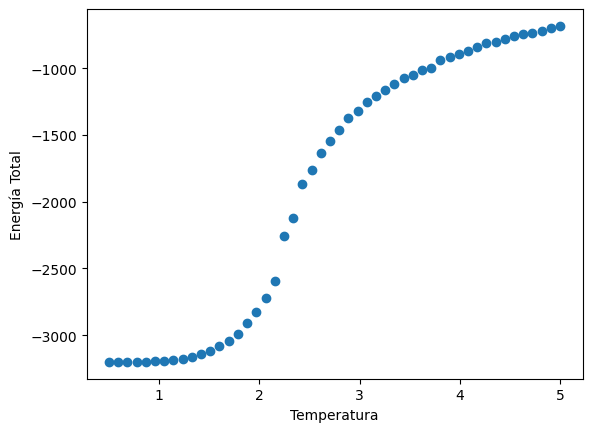

In [ ]:
import matplotlib.pyplot as plt
plt.plot(temperatures, mean_E, linestyle='None', marker='o')
plt.ylabel("Energía Total")
plt.xlabel("Temperatura")

Como se puede ver en la gráfica, para temperaturas cercanas a 0 la energía total es muy cercana -3200. Esto concuerda con lo esperado, ya que, si se suponen condiciones periódicas de frontera, por cada espín hay una contribución a la energía total de -4 y la grilla contiene $1600$ spines. La contribución a la energía total es positiva porque en la configuración inicial se escogieron todos los espines con un valor de $+1$. Si se hubiera inciado con un estado donde todos los espines valieran $-1$, la energía total sería negativa. Si el estado inicial fuera aleatorio, después de la termalización, para temperaturas debajo de la temperatura crítica, eventualmente todos los espines adquirirían el mismo signo.

Por ejemplo, para $T=1$ y un estado inicial aleatorio:

Text(0.5, 0, 'Número de iteración')

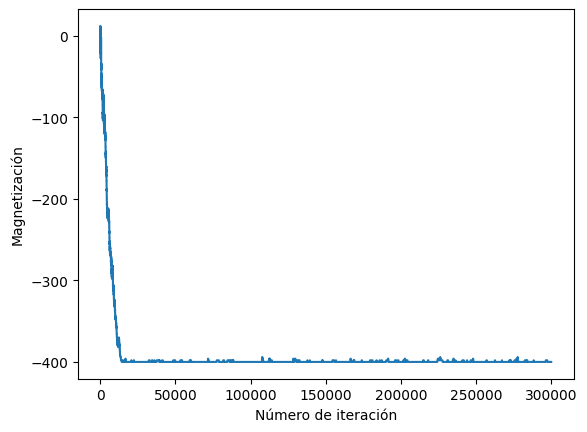

In [ ]:
energies_rand, magnetizations_rand, temperatures_rand = simulate_Ising(Ti=1, Tf=1, steps=1, size=20, mcsteps=300000, thermsteps=0, init_state=0)
plt.plot(magnetizations_rand[0])
plt.ylabel("Magnetización")
plt.xlabel("Número de iteración")

Donde se puede observar que rápidamente la magnetización de la grilla de espines adquiere su valor máximo. Es decir, los spines pasaron de una distribución aleatoria a una distribución alienada.

Conforme la temperatura se acerca a la temperatura crítica $T_C = 2.27$ la energía comienza a incrementar rápidamente. Esto concuerda con lo esperado, ya que, según la teoría, la capacidad calorífica tiende diverge a infinito para un sistema de tamaño inifinito.

Al graficar el valor esperado de la magnetización se observa que incialmente vale 1600. Como era de esperar para espines alineados hacia arriba. Cuando la temperatura se acerca a la temperatura crítica, la magnetización cae rápidamente a un valor de 0. Esto tiene sentido, porque, para temperaturas mayores a la temperatura crítica, la configuración de espines se desordena.

Text(0.5, 0, 'Temperatura')

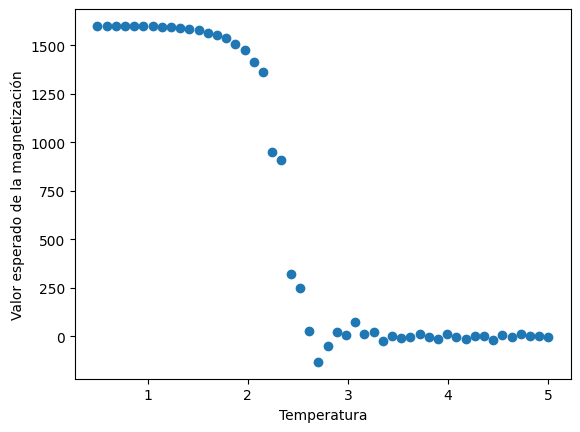

In [ ]:
plt.plot(temperatures, mean_M, linestyle='None', marker='o')
plt.ylabel("Valor esperado de la magnetización")
plt.xlabel("Temperatura")

En la gráfica de capacidad calorífica, los resultados que se obtienen también son correctos; para temperaturas cercanas a 0 la capacidad calorífica es muy cercana a 0, para temperaturas cercanas a la temperatura crítica se observa un rápido crecimiento de la capacidad calorífica. Si este sistema fuera de tamaño infinito se observaría una divergencia al inifinito. Como el sistema es finito solo se observa un pico.

Text(0.5, 0, 'Temperatura')

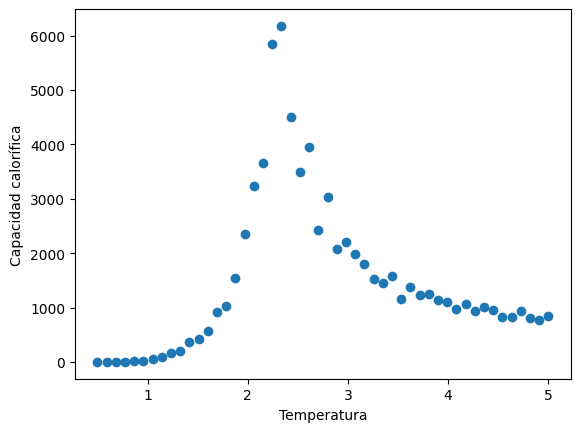

In [ ]:
plt.plot(temperatures, C, linestyle='None', marker='o')
plt.ylabel("Capacidad calorífica")
plt.xlabel("Temperatura")

### Implementación en C++

#### Módulos de la implementación

* $\texttt{ising.hpp}$ --> declaración de la clase
* $\texttt{ising.cpp}$ --> implementación de la clase
* $\texttt{run_ising.cpp}$ --> tiene la aplicación de la clase para `simulTemp`.
* $\texttt{simulation.cpp}$ --> tiene la aplicación para generar N *color maps* para diferentes iteraciones.
* $\texttt{simulation.sh}$ --> corre simulation.cpp (sin compilar) y genera un video de la secuencia.
* $\texttt{escalability_test.cpp}$ --> programa para medir el tiempo que tarda el método `configuration_update()`
* $\texttt{gnuplot-iostream.h}$ --> contiene la libreria que permite hacer el bind de gnuplot en C++ (implementación no propia)

#### Instrucciones para la compilar y correr el código

Esta implementación contiene varios módulos e implementaciones de códigos en C++ que se compilan con las siguientes instrucciones:

* g++ -c -Wall -fopenmp ising.cpp {aplicación}.cpp
* g++ -Wall ising.o {aplicación}.o -fopenmp -lboost_iostreams -lboost_system -lboost_filesystem -lboost_program_options

*Remplazar {aplicación} por cualquiera de los módulos que `.cpp` (diferentes a ising.cpp)*

- Esto genera un ejecutable $\texttt{a.out}$. Para el caso de $\texttt{simulation.cpp}$ no use este archivo, corra $\texttt{simulation.sh}$.

- Para utilizar un número diferente de hilos usar en la terminal

```shell
export OMP_NUM_THREAD={número de hilos}
```

**Importante**: Para compilar el código se necesita tener instalada la librería boost de C++, esto para poder utilizar $\texttt{gnuplot-iostream.h}$ de otra forma no compilará, esto puede instalarse con

```shell
sudo apt-get install libboost-all-dev
```



En este caso se optó por un enfoque de programación orientada a objetos bajo la filosofía de C++, en la cual si el código cae es por una mala implementación de diseño. Por esto se diseño una clase para modelar el módelo de Ising, considerando dos factores principales.

* Se plantea que la clase sea *memory safe*: la clase se diseña tal que no maneje recursos, es decir toda la memoria es maneja por la libreria estandándar.
* Para evitar estados indeterminados se plantea que todos lo miembros sean privados y que tenga respectivos métodos públicos para visualizarlos.
* Modulación del código: para que el código sea lo más portable posible que el código trabaje por módulos.
    
####  Construcción de la clase

```C++
class Ising
{
  private:
    Ising(); //Default constructor
    unsigned int N; //Dimension of the lattice
    int energy;
    int magnetization;
    int sqenergy;
    std::vector<int> lattice;
    //private methods access only by configuration update
    int close_neighbord_energy(const unsigned int &row, const unsigned int &col);
    void plot(std::vector<double>& x, std::vector<double>& y, std::string file_name, std::string Xlabel, std::string Ylabel, std::string color, std::string Legend);
    std::vector<double> sampling(const double &init, const double &end, const unsigned int &steps);

  public:

    //Constructors
    Ising(const unsigned int &size);
    ~Ising();
    Ising(const Ising &obj);
    Ising &operator=(const Ising &obj);
    
    //Methods
    unsigned int get_N();
    int getEnergy();
    int getMagnetization();
    int getSqenergy();
    std::vector<int> get_lattice();
    void lattice_cmap(const unsigned int& filenumber, const double &temperature, const unsigned int &iterations);
    void configuration_reset();
    void configuration_update(const double &beta, const double &J, const double &H, const unsigned int &max_iter);
    void simulTemp(const double& T_max, const double& T_min, const unsigned int& steps, const unsigned int& iterations, const double& J, const double& H);

};

```

El objeto representa la grilla de elementos con un spín inicial, además de características física. Los métodos en su mayoría modelan las interacción internas y externas de los elementos de la grilla. Por supuesto como todos los miembros son privados, se crean métodos para visualizar estos fuera de la implementación de la clase, para esto son los métodos públicos `get_N()`, `getEnergy()`, `getMagnetization()`, `getSqenergy()` y `get_lattice()`.

Luego está `configuration_reset()`que retorna la grilla a su estado inicial o *default*, `configuration_update` ejecuta el algoritmo de metropolis y `simulTemp` simula el comportamiento de la grilla a diferentes temperaturas.

El método `close_neighbord_energy`calcula el $dE$, y los otros métodos son simplemente para la visualización de la grilla.

#### Implementación de la clase

En este caso se discutirán los métodos relevantes para el módelado del fénomeno físico. Lo primero que hay que considerar antes de adentrarse en el análisis de los métodos es que todo el código está implementado bajo la premisa de que las condiciones de frontera son periódicas, ya que de otra forma hay optimizaciones en el código que no funcionan en otras condiciones o deben ser adaptadas, como la suma de vecinos más cercanos y el uso de mapas.

##### Cambio de energía al rotar un spín
```C++
int Ising::close_neighbord_energy(const unsigned int &row, const unsigned int &col){
  int dE = 0;
  dE = 2*lattice[ (row*N) + col ]*( lattice[ ((row + N - 1) % N) * N + col ] +
                                    lattice[((row + 1) % N) * N + col] +
                                    lattice[row * N + (col + N - 1) % N] +
                                    lattice[row * N + (col + 1) % N]
                                   );
  return dE;
}

```

En este caso se tiene un método que dados los indices, toma un spin para el cuál calcula el cambio de energía con el método de frontera periódica. Esto se implementa de la siguiente manera, se multiplica por dos para tomar las interacciones con los vecinos una sola vez, luego utilizando la función de módulo, se puede elegir cualquier indice que siempre va estar dentro de la grilla. Es decir la grilla tiene una topología similar la de superficie de una esfera.

##### Algoritmo de Metropolis
```C++
void Ising::configuration_update(const double &beta, const double &J, const double &H, const unsigned int &max_iter){
  int dE = 0;
  int dM = 0;
  
  std::random_device rd;
  std::mt19937 rng(rd());
  std::uniform_real_distribution<double> rndb(0, 1);

  std::unordered_map<int, double> probE = {
    {-8, exp(8 * beta * J)},
    {-4, exp(4 * beta * J)},
    {0, 1},
    {4, exp(-4 * beta * J)},
    {8, exp(-8 * beta * J)},
  };

  std::unordered_map<int, double> probM{
    {-2, exp(-2*beta *H)},
    {2, exp(2*beta*H)},
  };
  #pragma omp parallel reduction( + : energy, magnetization, sqenergy) shared(rng) private(dE,dM)
  {
  #pragma omp for schedule(static)
    for (unsigned int i = 0; i < max_iter; ++i){
	  unsigned int row = static_cast<unsigned int>( floor(rndb(rng) * N));
      unsigned int col = static_cast<unsigned int>( floor(rndb(rng) * N));

      dE = close_neighbord_energy(row, col);
      dM = 2*lattice[ (row*N) + col ];

      if (rndb(rng) < probM[dM]*probE[dE]){
        lattice[ (row*N) + col ] = -lattice[ (row*N) + col ];
        energy += -dE;
        sqenergy += dE*dE;
      }
      magnetization += dM;
    }
  }
}
```

Está es la implementación del algoritmo de Metropolis, en este caso lo primero que se hace es usar un generador de números aleatorios como lo es el mersenne twister, se usa específicamente la distribución `mt19937` con un dispositivo random `random_device` que usa componentes del hardware para generar semillas y crear números aleatorios para una distribución uniforme de números pseudo aleatorios de tipo real.

Luego, dada la naturaleza del algoritmo de Metropolis, como solo se voltea un spín a la vez, y como solo importan las interacciones entre elementos contiguos, se tiene una combinación finita de posibles $dE$ y $dM$ aprovechando está característica se crea un mapa para calcular fuera del *loop* las probabilidades, esto aumenta la eficiencia, ya que calcular exponenciales dentro de *for loops* tomaría tiempo inecesario. Notése que la probabilidad depende del Hamiltoniano, sin embargo por las propiedades de los exponenciales se puede obtener la probabilidad total como la multiplicación de la contribución de $JdE$ y $HdM$ por separado lo que nos permite usar dos mapas. Otro factor a destacar es que estos mapas son desordenados, ya que si bien toman más memoría(relativamente poca para este caso), son mucho más rápidos al no tener que ir elemento a elemento.

Después de esto se habré un *for loop* donde se voltearán spines de manera aleatoria y dependiendo de la probabilidad de que esto se de se acepta o no el cambio, para ello se ocupan índices aleatorios que son calculados con una distribución uniforme real, y luego son convertidos a enteros. Cabe la duda del porque no se usó una distribución entera desde el inicio, y la respuesta está en que se notó una menor correlación entre los números enteros generados, ya que primero se evita la operación de módulo para determinar que el número esté en cierto rango esto se reemplaza con una multiplicación que requiere menos cíclos de computación, y un redondeo con la función `floor()`. Después con esos indices se calcula el cambio de energía y de magnetización para pasar a la condición de aceptación del algoritmo de Metropolis, en el cuál si la probabilidad de que el evento pasé es mayor a un número aleatorio, entonces se acepta el cambio de spin, lo que implica cambios de energía y de magnetización. Notése que la magnetización está fuera del *scope* del `if` se hizo así ya que no se calcula directamente la magnetización y el promedio de la magnetización para eventos muy grandes es lo suficientemente cercano al valor real de magnetización.

###### Paralelización

Para la paralelización se utilizó memoria distribuida con Open. El único método paralelizado fue este, esto debido a los siguientes factores:

* Este método tiene operaciones atómicas sobre elementos que no son fácilmente reducibles fuera del método.
* Este método permite no tener que generar hilos especiales para tratar con los generadores y dispositivos aleatorios lo que evita estados indeterminados.
* Este es el método que por si solo requiere el mayor número de computaciones.
* Los otros métodos que operan en *for loops* usan este método dentro de ellos, por lo que para evitar que regiones paralelas sean abiertas dentro de otras regiones paralelas sin control alguno lo que puede provocar potenciales perdidas de memoria que se quiere evitar a toda costa.

Notése que los valores $dE$ y $dM$ deben pertencer a cada hilo por aparte, como se declararon fuera de la región, es necesario declararlos privados, por otro lado `rng` tiene que ser compartido, ya que esto evita una generación nueva de semillas cada vez que se cumple un cíclo del *loop*

Luego el *schedule* es estático, ya que como las probabilidades están calculadas, y solo se manejan -1 y 1, el tiempo de computación es lo suficientemente equitativo para usar esto.

##### Simulación del comportamiento de la grilla a diferentes temperaturas

```C++
void Ising::simulTemp(const double& T_max, const double& T_min, const unsigned int& steps, const unsigned int& iterations, const double& J, const double& H){

  std::vector<double> T(steps , 0.0);
  std::vector<double> mean_energy( steps, 0.0);
  std::vector<double> mean_magnetization(steps, 0.0);
  std::vector<double> specificHeat( steps, 0.0 );

  T = sampling(T_min, T_max, steps);

  for (unsigned i = 0; i < steps; ++i){
    configuration_update(1/T[i], J, H, iterations);

    mean_energy[i] = energy / (4.0*iterations);
    mean_magnetization[i] = magnetization / (2.0*iterations);
    specificHeat[i] = ( 1/std::pow(T[i],2) ) * ( sqenergy /(8.0*iterations) - std::pow( energy /(1.0*iterations), 2)/8.0 );

    configuration_reset();
  }

  plot(T, mean_energy, "Energy_plot", "Temperature (kT)", "Energy", "'red'" ,"mean energy per spin");

  plot(T, mean_magnetization, "Magnetization_plot", "Temperature (kT)", "Magnetization", "'blue'" ,"mean magnetization per spin");

  plot(T, specificHeat, "SpecHeat_plot", "Temperature (kT)", "Specific Heat","'#00B1A0'"  , "specific heat");

}
```

Este método lo que hace es simular el comportamiento de la grilla a diferentes temperaturas, luego con con datos estadísticos obtiene relaciones de energía, magnetización y capacidad calorífica y los gráfica usando el método `plot()`. Básicamente toma la temperatura inicial y la temperatura final, el tamaño del salto entre temperatura y temperatura, y las iteraciones totales a ejecutar. Para esto se ocupan arreglos unidimensionales para guardar los valores. Posteriormente se gráfica las dependencias con la temperatura. Este método usa otros tres métodos de la clase, `sampling()`para crear un arreglo de Temperaturas con temperaturas equidistantes, `configuration_update()` para cambiar los spines de la grilla acorde con la temperatura (notése que el método toma $\beta$ no $T$) usar la relación entre estas variables. Luego se usa `configuration_reset()` para tomar valores de energía, magnetización y capacidad calorífica acorde con la nueva temperatura.

Estos son los métodos relevantes del módelo, los otros métodos simplimente son o para acceder a información de los miembros de la clase, o para la gráficación.

Las gráficas obtenidas a partir del este código fueron las siguientes:

In [4]:
from IPython.display import IFrame
IFrame("Plots/Energy_plot.pdf", width = 600, height =600)

In [5]:
IFrame("Plots/Magnetization_plot.pdf", width = 600, height =600)

In [6]:
IFrame("Plots/SpecHeat_plot.pdf", width = 600, height =600)

Las cuales son congruentes con las obtenidas con la implementción python.

También tenemos el gráfico de escalabilidad al aplcar la paralelización, en la cual se observó que se paso un cambio de 11 s (1 hilo) hasta 3s (8 hilos), en una grilla de 1000x1000 con 10000000 iteraciones.

In [7]:
IFrame("Plots/Escalability.pdf", width = 600, height =600)

## Conclusiones
En general podemos recalcar los siguiente:
- Con base en las diferentes gráficas se observa que la temperatura crítica $T ≈ 2.5 (k_{B} T)$.
- Se observa la continuidad y tendencia esperadas de la energía, hay una subida de energía al acercarse al $T_{c}$.
- La magnetización también tiene su cambio rápido de su valor inicial a 0 justo después de haber pasado por las temperatura crítica.
- Se identifica el pico de desicontinuidad esperado en la capacidad calórifica cerca del valor de $T_{c}$.
- Se comprueba con lo anterior que existe un cambio de fase.
- Se redujo el tiempo de implemetación al aplicar la paralización en C++, en python dura aproximadamente 3-4 minutos. Mientras que en C++ el código para 1 hilo dura alrededor de 11 segundos para una grilla de $1000\times1000$ para un *update* de $10 000 000$ de iteraciones, esto es mucho menor para una grilla mucho más grande y una cantidad mucho mayor de iteraciones, aunque esto no toma en cuenta el cambio de temperatura.
- Hay una escalabilidad adecuada del modelo al utilizar OpenMP, pasa de 10 s con un hilo a cerca de los 3 segundos con 8 hilos.
- La simulación muestra como ocurre la termalización del material (la alineación de espines). Comienza en espines en -1 a $T = 5(k_{B} T)$ y termina en espines 1 con $ T = 0.5 (k_{B} T)$.

## Referencias del material
El material referente a este trabajo se encuentra en el GitHub: https://github.com/d1eg011/Proyecto_FC

La documentación del código de python se encuentra en: https://d1eg011.github.io/Proyecto_FC/

## Bibliografía

Bennett, D. (2016). _Numerical Solutions to the Ising Model using the Metropolis Algorithm_. https://www.maths.tcd.ie/~dbennett/js/ising.pdf

Molignini P. (2013). _Analyzing the two dimensional Ising model with conformal field theory_. https://edu.itp.phys.ethz.ch/fs13/cft/SM2_Molignini.pdf

Montes de Oca‑Mora, N.J. et al. (2023). J. Phys.: Conf. Ser. 2459 012028. https://iopscience.iop.org/article/10.1088/1742-6596/2459/1/012028